# Word2vec

In [1]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [2]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, size=10,window=3)
print(model)


Word2Vec(vocab=15, size=10, alpha=0.025)


In [3]:
words = list(model.wv.vocab)
print(words)



['this', 'is', 'a', 'first', 'example', 'of', 'text', 'the', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [4]:

print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[ 0.02121025  0.01514282 -0.03220494  0.03192458  0.01994679 -0.00223293
  0.0493652  -0.02570761 -0.02424824  0.03724622]


In [5]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=15, size=10, alpha=0.025)


In [6]:
X = model.wv[new_model.wv.vocab]

In [7]:
X.shape

(15, 10)

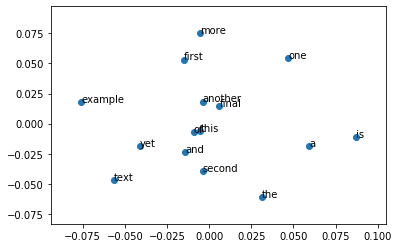

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [9]:
import gensim.downloader as api

In [10]:
corpus = api.load('text8')

In [11]:
type(corpus)


text8.Dataset

In [12]:
from gensim.models.word2vec import Word2Vec
model8= Word2Vec(corpus)

In [13]:
model8.wv['tree']

array([ 7.60537863e-01, -1.49803743e-01,  9.88541901e-01, -1.41106784e+00,
        2.33314967e+00,  3.92314136e-01,  2.47688442e-01,  1.36884153e+00,
       -3.48729407e-03,  1.50888038e+00, -1.76231050e+00,  7.72656858e-01,
       -6.26827419e-01, -1.53506184e+00,  3.85377914e-01, -5.87179601e-01,
        2.05267563e-01,  7.78298303e-02,  1.36961961e+00, -1.23082519e+00,
        1.27297854e+00,  1.37598825e+00,  3.32121432e-01, -1.83223403e+00,
        1.10675561e+00,  3.99314165e-01,  5.44995308e-01,  5.63454255e-02,
        9.43142354e-01, -1.09193824e-01, -3.17154956e+00,  1.41294754e+00,
       -7.89795041e-01, -2.00199556e+00,  2.80443996e-01, -8.35252881e-01,
       -8.34691286e-01, -1.47635603e+00,  3.48010778e+00,  9.29560483e-01,
       -7.51909912e-01,  1.85136366e+00,  7.97186255e-01, -3.93854946e-01,
        1.76942311e-02,  2.12495708e+00, -2.14792728e+00,  9.75328684e-01,
        5.55660129e-01,  8.03130031e-01,  7.29087949e-01,  3.38995814e-01,
        8.43861699e-01,  

In [22]:
print(model8.wv.most_similar('tree'))

[('trees', 0.6877751350402832), ('bark', 0.6862379312515259), ('leaf', 0.6663551926612854), ('flower', 0.6195982098579407), ('cactus', 0.6154307126998901), ('bird', 0.603261411190033), ('fruit', 0.5988692045211792), ('avl', 0.5984017848968506), ('sap', 0.5765584111213684), ('beetle', 0.569049596786499)]


In [23]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Analogies

In [24]:
#v(king)-v(man)+v(woman)
print(model8.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.6869389414787292), ('empress', 0.6309577226638794), ('throne', 0.6144437193870544)]


In [25]:
print(model8.wv.most_similar(positive=['italy', 'renault'], negative=['france'], topn=3))


[('scuderia', 0.7464247941970825), ('isuzu', 0.7158533930778503), ('curtiss', 0.6857039928436279)]


In [26]:
print(model8.wv.most_similar(positive=['france', 'venice'], negative=['italy'], topn=3))


[('toulouse', 0.7622063159942627), ('paris', 0.7249298691749573), ('strasbourg', 0.7240688800811768)]


In [27]:
print(model8.wv.most_similar(positive=['usa', 'beatles'], negative=['england'], topn=3))

[('dj', 0.6085663437843323), ('mariah', 0.6008746027946472), ('garth', 0.599155843257904)]


In [20]:
model8.wv.most_similar(['apple','orange'])

[('mcintosh', 0.6513445377349854),
 ('iic', 0.6071711778640747),
 ('jaguar', 0.606622576713562),
 ('ecs', 0.6031804084777832),
 ('juice', 0.6030834913253784),
 ('logo', 0.600700855255127),
 ('iie', 0.597471296787262),
 ('iigs', 0.5943852663040161),
 ('grille', 0.5924081206321716),
 ('toy', 0.5794016718864441)]

##  Loading pre-trained models

In [28]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [ ]:
print(model.most_similar('tree'))

In [ ]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


In [ ]:
print(model.most_similar(positive=['italy', 'england'], negative=['beatles'], topn=3))


## Glove

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.42B.300d.txt'
word2vec_output_file = 'glove.42B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

In [ ]:
from gensim.models import KeyedVectors

filename = 'glove.42B.300d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

In [ ]:
print(model.most_similar('tree'))